In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report


In [2]:
# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Check shape
print("Train shape:", x_train.shape)
print("Test shape:", x_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


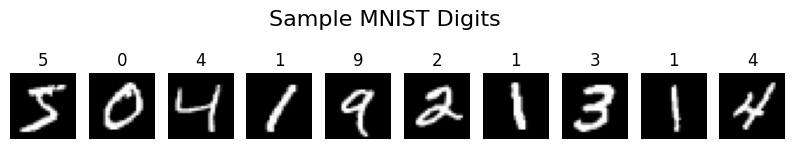

In [3]:
plt.figure(figsize=(10,2))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.suptitle("Sample MNIST Digits", fontsize=16)
plt.show()


In [4]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Convert 28x28 image to 784 vector
    layers.Dense(128, activation='relu'), # Hidden layer
    layers.Dense(10)                      # Output layer (logits)
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8661 - loss: 0.4703 - val_accuracy: 0.9613 - val_loss: 0.1327
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9613 - loss: 0.1344 - val_accuracy: 0.9707 - val_loss: 0.1031
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9743 - loss: 0.0877 - val_accuracy: 0.9750 - val_loss: 0.0853
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9811 - loss: 0.0612 - val_accuracy: 0.9762 - val_loss: 0.0859
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9847 - loss: 0.0489 - val_accuracy: 0.9778 - val_loss: 0.0811


In [6]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f" Test Accuracy: {test_acc:.4f}")


313/313 - 1s - 2ms/step - accuracy: 0.9782 - loss: 0.0764
 Test Accuracy: 0.9782


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


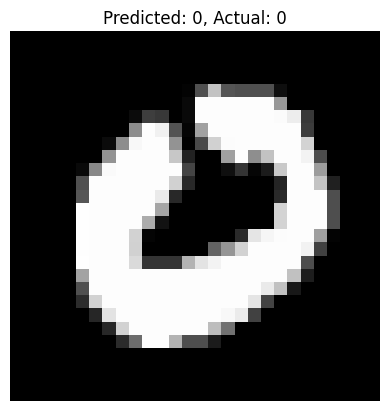

In [7]:
# Create model with softmax for prediction
prob_model = tf.keras.Sequential([model, layers.Softmax()])

# Predict on a sample
sample_idx = 25
pred = prob_model.predict(np.expand_dims(x_test[sample_idx], axis=0))
predicted_label = np.argmax(pred[0])
true_label = y_test[sample_idx]

# Show the prediction
plt.imshow(x_test[sample_idx], cmap='gray')
plt.title(f"Predicted: {predicted_label}, Actual: {true_label}")
plt.axis('off')
plt.show()
